# **Exploratory Data Analysis (EDA) on Haberman's Breast Cancer Survival Dataset**

## About Dataset
Kaggle Link : https://www.kaggle.com/gilsousa/habermans-survival-data-set

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

## Importing all Libraries 

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

## Load Dataset

In [64]:
# load dataset
df=pd.read_csv('haberman.csv',names=["age","operation_year","axil_nodes","survival_status"])
df

,age,operation_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


# Description about Dataset

In [65]:
# no. of data points and features
df.shape

(306, 4)

In [66]:
# features or attributes
df.columns

Index(['age', 'operation_year', 'axil_nodes', 'survival_status'], dtype='object')

so data points are 306 and features are 4 with named as age, operation_year, axil_nodes, survival_status

In [67]:
# other information
df.describe()

,age,operation_year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [68]:
# number of data points per class
df['survival_status'].value_counts()

1    225
2     81
Name: survival_status, dtype: int64

It is unbalanced dataset as the number of data points per class are different. Rrom the above information, there are 225 patients who survived 5 years or longer than 5 years and 81 patients who died within 5 years.

# Objective of the Problem

We have loaded Haberman's Breast Cancer Survival Dataset Following is the information about dataset :

rows or data points are 306 and 

columns or features are 4 named as age, operation_year, axil_nodes, survival_status

where, 
1. age - age of patient
2. operation_year - year of operation
3. Axil_nodes - Number of positive axillary nodes detected
4. Survival_Status - (1) : the patient survived 5 years or longer (blue),
(2) : the patient died within 5 year (orange)

So, 

**Our task is to find which feature is useful for classification of dataset and whether the patient survived 5 years or more than 5 years or not**                      


# Bibariate Analysis

## 2D Scatter Plots

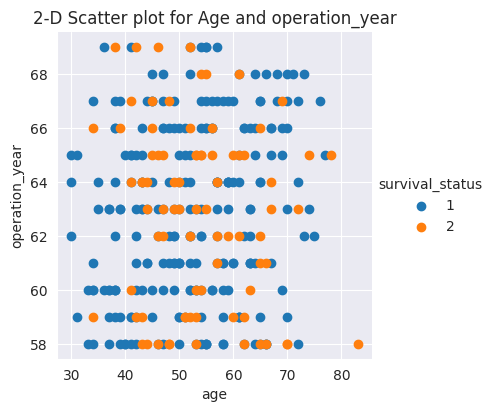

In [69]:
# age vs operation_year
sn.set_style("darkgrid");
sn.FacetGrid(df, hue = "survival_status", height = 4).map(plt.scatter, "age", "operation_year").add_legend()
plt.title('2-D Scatter plot for Age and operation_year')
plt.show()

Cant make any sense for this plot about survival of patients or any other thing.

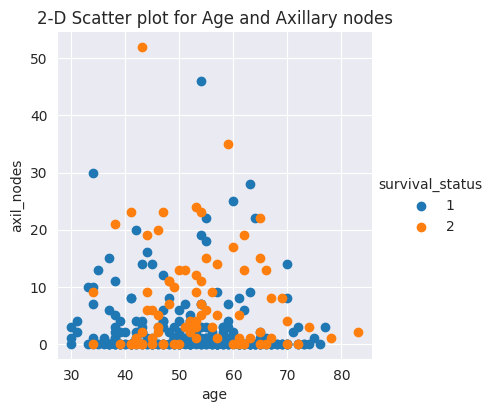

In [70]:
# age vs axil_nodes
sn.set_style("darkgrid");
sn.FacetGrid(df, hue = "survival_status", height = 4).map(plt.scatter, "age", "axil_nodes").add_legend()
plt.title('2-D Scatter plot for Age and Axillary nodes')
plt.show()

From this plot also, we cannot able to make any assumptions.

## Pair Plots

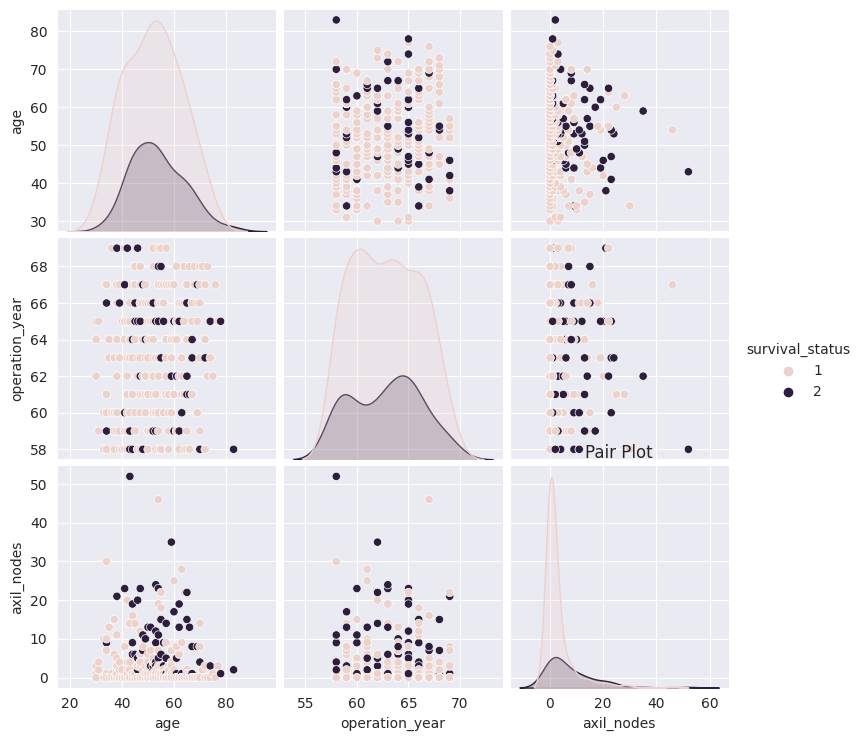

In [71]:
sn.set_style("darkgrid");
sn.pairplot(df, hue = "survival_status")
plt.title("Pair Plot")
plt.show()

From this plot also, we cannot able to make any assumptions as all points are spread across.

# Univariate Analysis

## Histograms

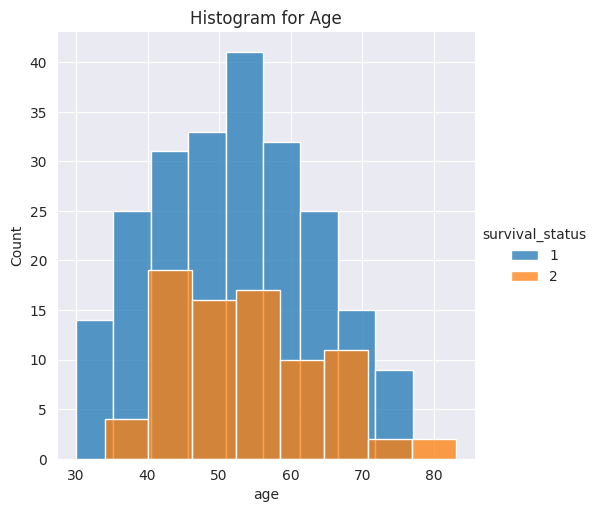

In [29]:
# Histogram for Age
sn.set_style("darkgrid")
sn.FacetGrid(df, hue = 'survival_status',height = 5).map(sn.histplot,'age').add_legend()
plt.title("Histogram for Age")
plt.show()

From above plot, we observe that 

1. Age between 52 and 57 the survival count for survival status 1 is maximum means more patients survived 5 years or more than that.

2. Age between 40 and 47 the survival count for survival status 2 is maximum means more patients died within 5 years.

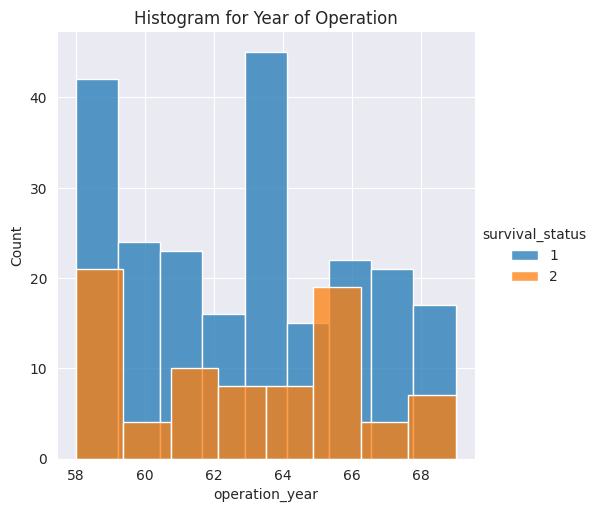

In [31]:
# Histogram for Year of Operation
sn.set_style("darkgrid")
sn.FacetGrid(df, hue = 'survival_status', height = 5).map(sn.histplot,'operation_year').add_legend()
plt.title("Histogram for Year of Operation")
plt.show()

From above plot, we observe that 

1. In year 58-59 and 63-64 the survival count for survival status 1 is maximum means more patients survived 5 years or more than that.

2. In year 58-59 and 65-66 the survival count for survival status 2 is maximum means more patients died within 5 years.

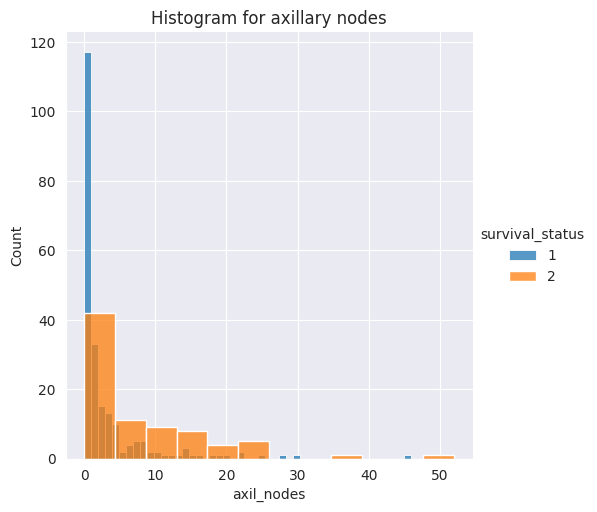

In [32]:
# Histogram for axillary nodes
sn.set_style("darkgrid")
sn.FacetGrid(df, hue = 'survival_status', height = 5).map(sn.histplot,'axil_nodes').add_legend()
plt.title("Histogram for axillary nodes")
plt.show()

From above plot, we observe that

1. Less number of nodes detected that is around 2 or lesser than 2, then the chance of survival of patient increases. 

2. More the nodes, less are the chances of survival.

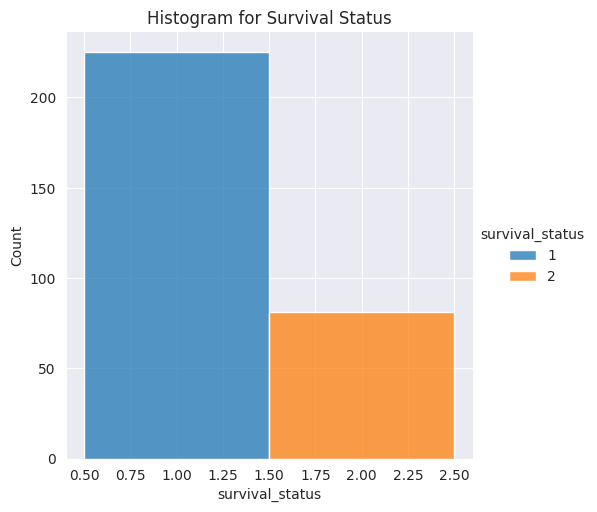

In [33]:
# Histogram for Survival Status
sn.set_style("darkgrid")
sn.FacetGrid(df, hue = 'survival_status', height = 5).map(sn.histplot,'survival_status').add_legend()
plt.title("Histogram for Survival Status")
plt.show()

From above plot, we observe that

Survival status 1 means number of patients survived 5 years or more is 225 and 

Survival status 2 means number of patients died within 5 years is 81.

## Probability Density Functions (PDF)'s and Cumulative Distribution Functions (CDF)'s

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[0.05228758 0.14052288 0.29084967 0.46405229 0.64379085 0.77777778
 0.91176471 0.97058824 0.99346405 1.        ]


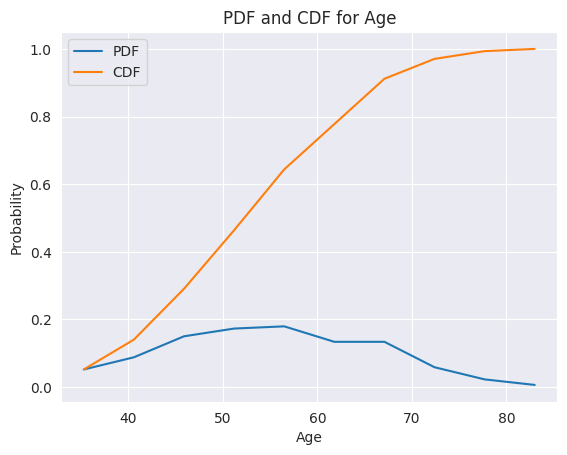

In [41]:
# PDF and CDF for Age

count, bin_count = np.histogram(df["age"], bins = 10)
pdf = count/sum(count)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_count[1:], pdf, label="PDF")
plt.plot(bin_count[1:], cdf, label="CDF")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("PDF and CDF for Age")
plt.show()

From this graph, we can say that around 43% patients survived before age 50. That means younger the patient, more are the chances of survival for 5 years or more than that. 

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


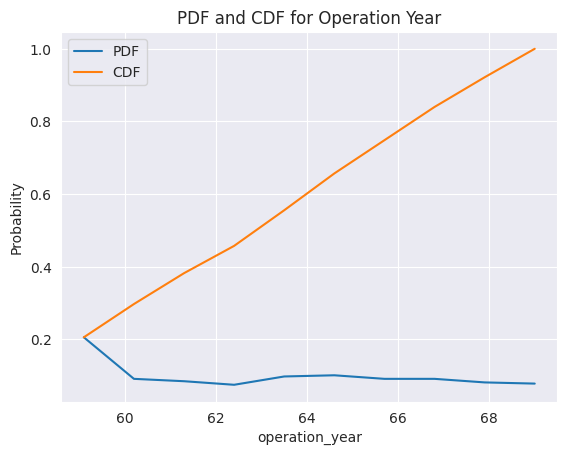

In [42]:
# PDF and CDF for Operation Year

count, bin_count = np.histogram(df["operation_year"], bins = 10)
pdf = count/sum(count)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_count[1:], pdf, label="PDF")
plt.plot(bin_count[1:], cdf, label="CDF")
plt.legend()
plt.xlabel("operation_year")
plt.ylabel("Probability")
plt.title("PDF and CDF for Operation Year")
plt.show()

From this plot also, we cannot able to make any assumptions. Actually we can, but it will not be true because our sample size is so small that means data is only for decade.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[0.77124183 0.86928105 0.92810458 0.95424837 0.98366013 0.99019608
 0.99346405 0.99346405 0.99673203 1.        ]


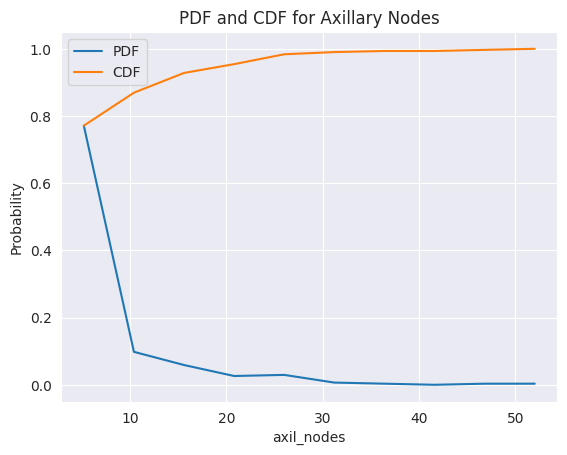

In [44]:
# PDF and CDF for Axillary Nodes

count, bin_count = np.histogram(df["axil_nodes"], bins = 10)
pdf = count/sum(count)
print(pdf)

cdf = np.cumsum(pdf)
print(cdf)

plt.plot(bin_count[1:], pdf, label="PDF")
plt.plot(bin_count[1:], cdf, label="CDF")
plt.legend()
plt.xlabel("axil_nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF for Axillary Nodes")
plt.show()

From this graph we can assume that around 80% patients survived when there are less than 20 nodes are detected. But it not sure as our sample size is small.

But we can surely say that lesser number of nodes detected makes higher chances for survival of patients.

# Box Plots and Whiskers

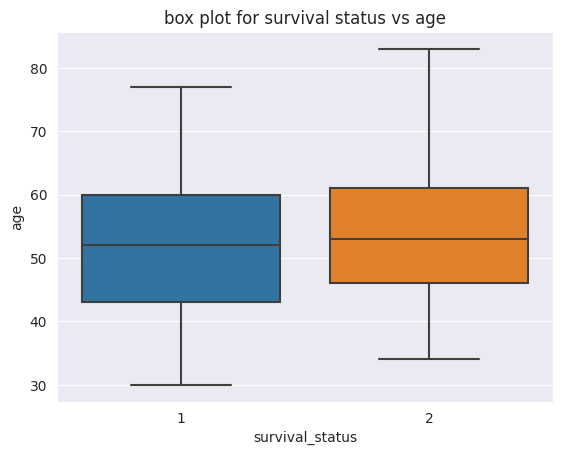

In [51]:
# box plot for survival status vs age

sn.boxplot(data = df, x = "survival_status", y = "age")
plt.title("box plot for survival status vs age")
plt.show()

From this box plot, we can say that

For survival status 1, the age for 25th, 50th and 75th Inter Quartile Range (IQR) is 43, 52 and 60 respectively.

For survival status 2, the age for 25th, 50th and 75th Inter Quartile Range (IQR) is 46, 53 and 62 respectively.

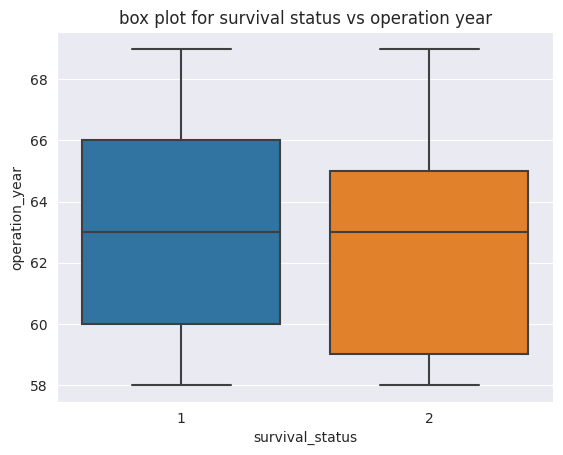

In [50]:
# box plot for survival status vs operation year

sn.boxplot(data = df, x = "survival_status", y = "operation_year")
plt.title("box plot for survival status vs operation year")
plt.show()

For operation year we are not going to make any assumption because dataset only in a decade.

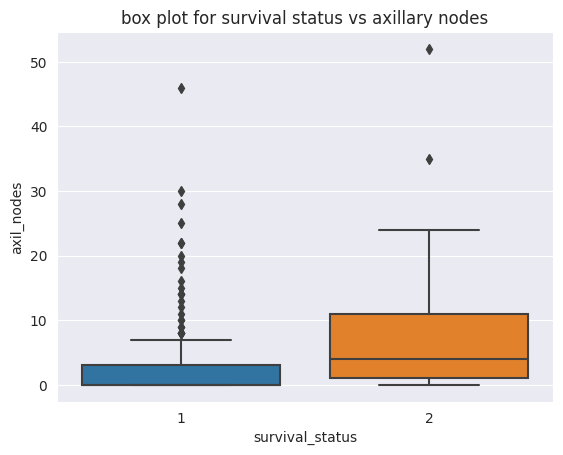

In [49]:
# box plot for survival status vs axillary nodes

sn.boxplot(data = df, x = "survival_status", y = "axil_nodes")
plt.title("box plot for survival status vs axillary nodes")
plt.show()

From above box plot, we observe that most of 75 percentile for both survival statuses are under 12 number of nodes.

## Violin Plots

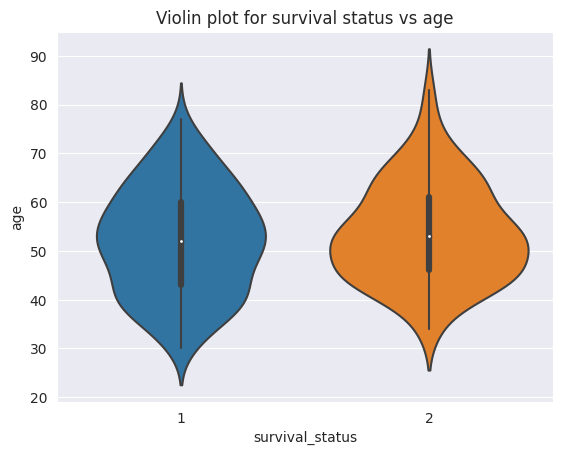

In [53]:
# Violin plot for survival status vs age

sn.violinplot(x = "survival_status", y = "age", data = df, height = 8)
plt.title("Violin plot for survival status vs age")
plt.show()

From the above plot, at the age of 53 maximum number of survived people are belongs and at the age 49 maximum non survived people belongs.






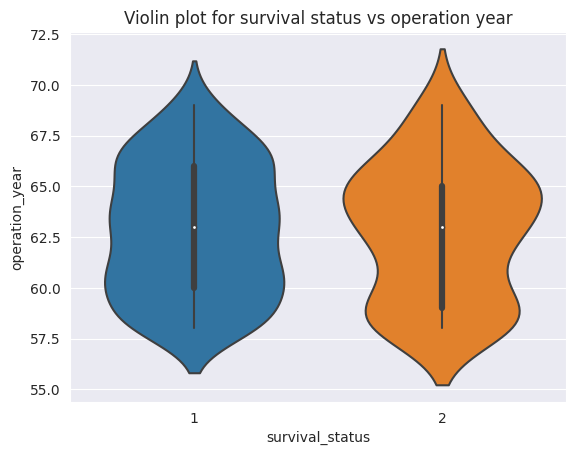

In [54]:
# Violin plot for survival status vs operation year

sn.violinplot(x = "survival_status", y = "operation_year", data = df, height = 8)
plt.title("Violin plot for survival status vs operation year")
plt.show()

Cant make any sense.

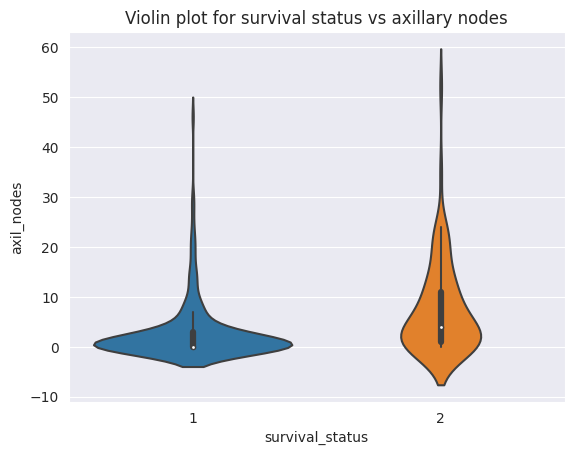

In [55]:
# Violin plot for survival status vs axillary nodes

sn.violinplot(x = "survival_status", y = "axil_nodes", data = df, height = 8)
plt.title("Violin plot for survival status vs axillary nodes")
plt.show()

From above plot, our observations are

*   0 to 1 number of nodes detected patients are more likely to survive for 5 years or more means patients who are in survival status 1.

*   more number of nodes detected patients are more likely to die within 5 years means patients who are in survival status 2.


 







## Mean, Median, Standard Deviation

In [60]:
print(np.mean(df['age']))
print(np.mean(df['axil_nodes']))

52.45751633986928
4.026143790849673


In [61]:
print(np.median(df['age']))
print(np.median(df['axil_nodes']))

52.0
1.0


In [62]:
print(np.std(df['age']))
print(np.std(df['axil_nodes']))

10.785785203631832
7.177896092811143


# Final Conclusion

From our all Exploratory Data Analysis on Haberman's Breast Cancer Survival Dataset, we conclude folllowing things :

*   'Axillary nodes' is more useful feature from all 4 features in classification to know the survival status.

*   The patients who are more likely to survive for more than 5 years are younger on average, than the patients who are more likely to die within 5 years.

*   The dataset is imbalanced, with a higher number of patients who survived longer compared to those who survived less.

*   But in short we can assume that less number of positive axillary nodes, the more chances of survival of patients of 5 years or more than 5 years.

*   We need more number of features and large sample size.







